In [27]:
from qiskit import *
from qiskit.aqua.circuits.gates import cry

from qiskit.visualization import plot_histogram
import numpy as np

In [101]:
theta = np.pi/4

time =2

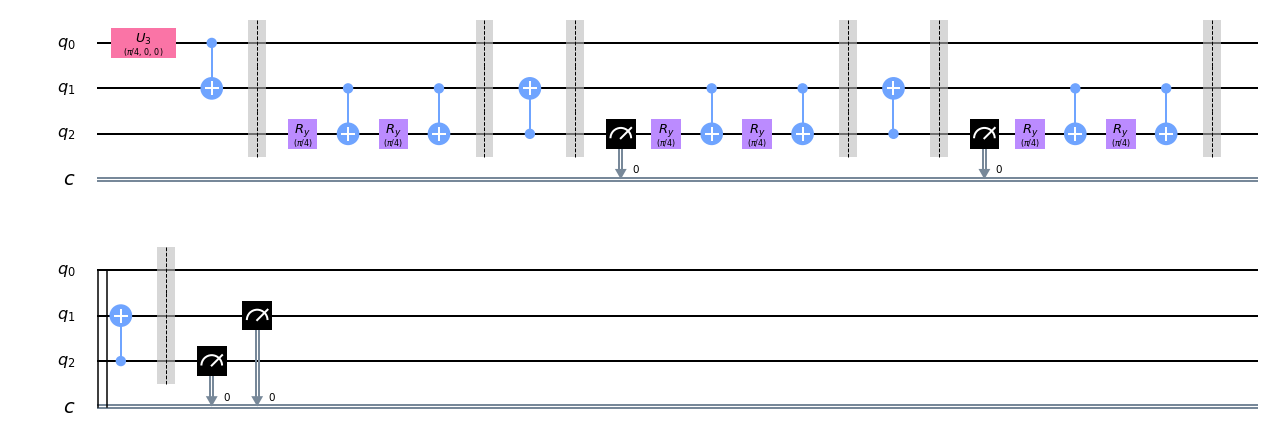

In [117]:
qc = QuantumCircuit(3,1)
qc.u3(theta,0,0,0)
qc.cx(0,1)
qc.barrier()
qc.ry(theta,2)
qc.cx(1,2)
qc.ry(theta,2)
qc.cx(1,2)
qc.barrier()
qc.cx(2,1)
qc.barrier()
qc.measure([2],[0])
qc.ry(theta,2)
qc.cx(1,2)
qc.ry(theta,2)
qc.cx(1,2)
qc.barrier()
qc.cx(2,1)
qc.barrier()
qc.measure([2],[0])
qc.ry(theta,2)
qc.cx(1,2)
qc.ry(theta,2)
qc.cx(1,2)
qc.barrier()
qc.cx(2,1)
qc.barrier()
qc.measure([2],[0])
qc.measure([1],[0])
qc.draw(output='mpl')


In [164]:
def getMeasure(qc, shots=8192):
    sim = Aer.get_backend('qasm_simulator') 
    # the device to run on

    job3 = execute(qc, sim, shots=shots)

    # Grab results from the job
    result3 = job3.result()

    # Returns counts
    counts3 = result3.get_counts()
    print(counts3)

La medida en 0 antes de cNot
{'0': 7011, '1': 1181}
La medida en 1 despues de cNot
{'0': 7015, '1': 1177}
Estamos en el tiempo 1
{'0': 7613, '1': 579}
Estamos en el tiempo 2
{'0': 7891, '1': 301}
Estamos en el tiempo 3
{'0': 8045, '1': 147}
Estamos en el tiempo 4
{'0': 8120, '1': 72}
Estamos en el tiempo 5
{'0': 8154, '1': 38}


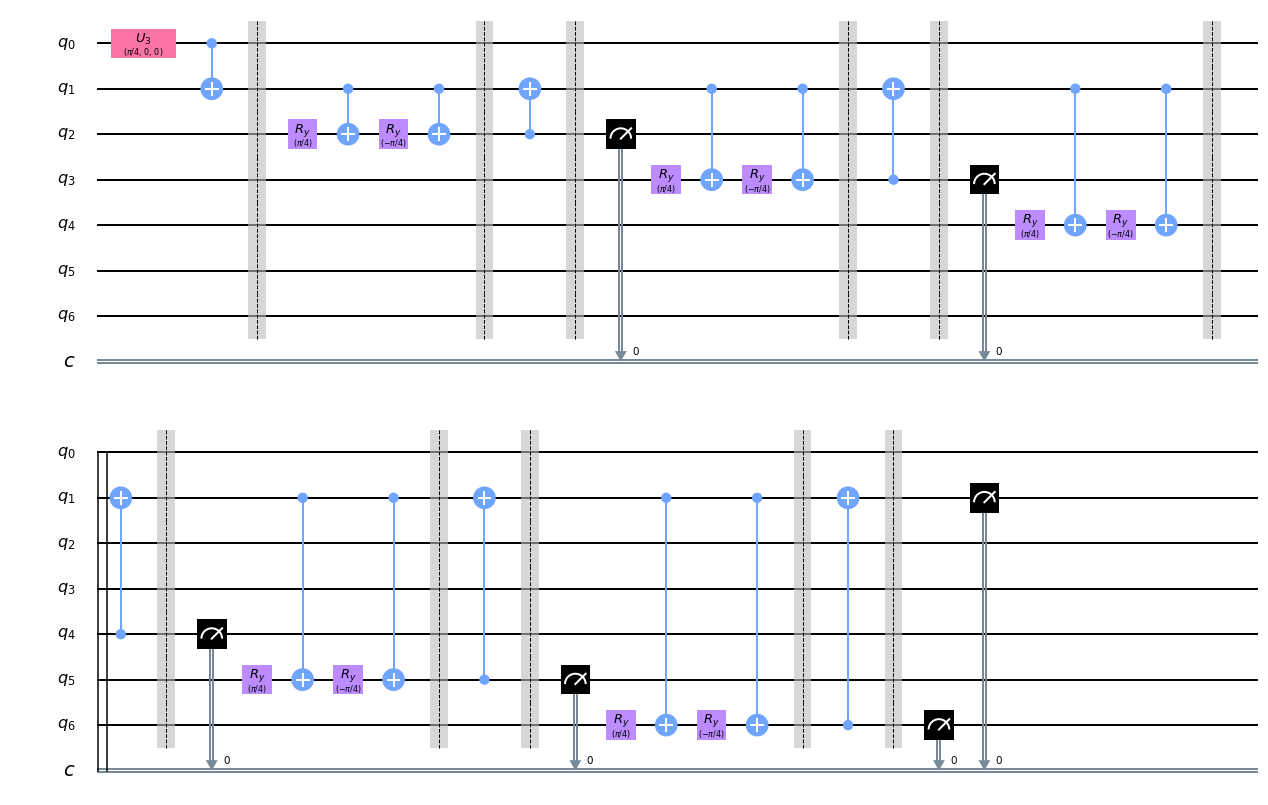

In [176]:
qc = QuantumCircuit(3,1)
qc.u3(theta,0,0,0)
qc.barrier()
qc.measure(0,0)
qc.barrier()
qc.cx(0,1)
qc.barrier()
print("La medida en 0 antes de cNot")
getMeasure(qc)


qc = QuantumCircuit(3,1)
qc.u3(theta,0,0,0)
qc.cx(0,1)
qc.barrier()
qc.measure(1,0)
print("La medida en 1 despues de cNot")
getMeasure(qc)

maxTime = 6
for j in range(1,maxTime):
    qc = QuantumCircuit(j+2,1)
    qc.u3(theta,0,0,0)
    qc.cx(0,1)
    qc.barrier()


    for i in range(0,j):
        #cry
        qc.ry(theta,i+2)
        qc.cx(1,i+2)
        qc.ry(-theta,i+2)
        qc.cx(1,i+2)
        qc.barrier()
        qc.cx(i+2,1)
        qc.barrier()
        qc.measure([i+2],[0])
    qc.measure([1],[0])
    print(f"Estamos en el tiempo {j}")
    getMeasure(qc)
    
    
qc.draw(output='mpl')

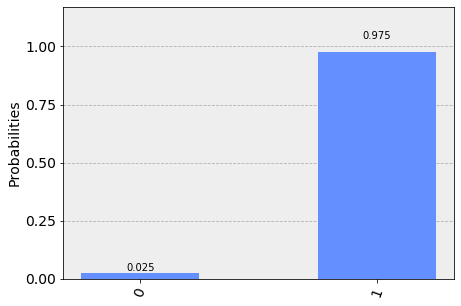

In [166]:
sim = Aer.get_backend('qasm_simulator') 
# the device to run on

job3 = execute(qc, sim, shots=8192)

# Grab results from the job
result3 = job3.result()

# Returns counts
counts3 = result3.get_counts()
plot_histogram(counts3)

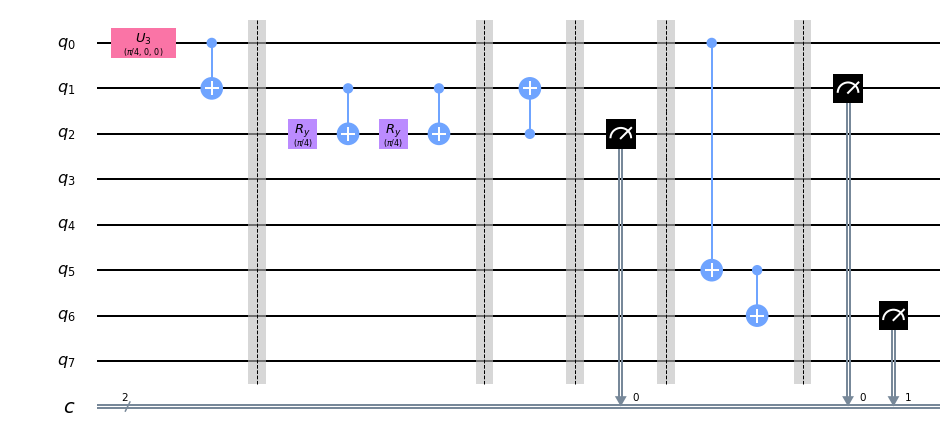

In [156]:
time =3
qc = QuantumCircuit(2*(time+1),2)
qc.u3(theta,0,0,0)
qc.cx(0,1)

# One time pass
qc.barrier()
qc.ry(theta,2)
qc.cx(1,2)
qc.ry(theta,2)
qc.cx(1,2)
qc.barrier()
qc.cx(2,1)
qc.barrier()
qc.measure([2],[0])
qc.barrier()

# Clone

qc.cx(0,time+2)
qc.cx(time+2,time+3)
qc.barrier()
qc.measure(1,0)
qc.measure(time+3,1)
qc.draw(output='mpl')